# Лабораторная работа №6
## Построение онтологической модели на основе графа сущностей

### Выполнил: Емельянов Андрей Сергеевич гр. 8ПМ21

## Описание задания

**Цель работы**: построить онтологическую модель на основе полученного графа сущностей в лабораторной работе №5.

**Входные данные**: 20 текстов размером от 100 слов (могут быть собраны вручную или автоматически - по выбору студента). Построенный по ним граф сущностей.

**Выходные данные**: онтологическая модель.

## Ход работы

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Сущности и словарь с предикатами

In [2]:
entities = {'хогвартс': {},
            'когтевран': {},
            'слизерин':{},
            'грифиндор':{},
            'гарри джеймс поттер эванс веррес': {'гермиона грейнджер': '1','драко малфой': '1','когтевран': '4','хогвартс': '4'},
            'майкл веррес эванс': {'гарри джеймс поттер эванс веррес': '2' },
            'мантия драко ': {'драко малфой': '3' },
            'петуния эванс веррес': {'гарри джеймс поттер эванс веррес': '2' }, 
            'гермиона грейнджер': {'хогвартс': '4','когтевран': '4' },
            'драко малфой': {'хогвартс': '4','слизерин': '4',  },
            'минерва макгонагалл':{'невилл лонгботт': '5','крэбб': '5','эрня макмиллан': '5','лиза турпин': '5','гермиона грейнджер': '5','драко малфой': '5','гарри джеймс поттер эванс веррес': '5','лиза турпин': '5' },
            'снейп': {'невилл лонгботт': '5','крэбб': '5','эрня макмиллан': '5','лиза турпин': '5','гермиона грейнджер': '5','драко малфой': '5','гарри джеймс поттер эванс веррес': '5','лиза турпин': '5' },
            'флитвик': {'невилл лонгботт': '5','крэбб': '5','эрня макмиллан': '5','лиза турпин': '5','гермиона грейнджер': '5','драко малфой': '5','гарри джеймс поттер эванс веррес': '5','лиза турпин': '5' },
            'квиррелл': {'невилл лонгботт': '5','крэбб': '5','эрня макмиллан': '5','гарри джеймс поттер эванс веррес': '6','лиза турпин': '5','гермиона грейнджер': '5','драко малфой': '5','лиза турпин': '5'},
            'лиза турпин': {'хогвартс': '4','когтевран': '4'},
            'спраут':{'невилл лонгботт': '5','крэбб': '5','эрня макмиллан': '5','лиза турпин': '5','гермиона грейнджер': '5','драко малфой': '5','гарри джеймс поттер эванс веррес': '5','лиза турпин': '5'},
            'эрня макмиллан': {'хогвартс': '4','пуффендуй': '4'},
            'крэбб': {'хогвартс': '4','слизерин': '4'},
            'невилл лонгботт': {'хогвартс': '4','грифиндор': '4'}   
           }

references = {
    '1': {'name': 'друзья', 'color': '#7CFC00'},
    '2': {'name': 'родители', 'color': 'black'},
    '3': {'name': 'принадлежит', 'color': 'blue'},
    '4': {'name': 'учиться в', 'color': '#FFD700'},
    '5': {'name': 'преподает у', 'color': 'green'},
    '6': {'name': 'враг для', 'color': 'red'}
}

## Построение онтологической модели

In [3]:
def create_graph(entities, references):
    G = nx.DiGraph()
    for entity_name in entities: # Ноды, находящиеся в словаре entities как его ключи
        G.add_node(entity_name)

        for entity_name, refered_entities in entities.items(): # Связи по значениям ключей
            for refered_entity_name, reference_code in refered_entities.items(): # Связный переход
                if reference_code in references: # Если цифра связи в references, используем информацию для создания связи
                    reference_info = references[reference_code]
                    reference_name = reference_info['name']
                    reference_color = reference_info['color']
                    G.add_edge(entity_name, refered_entity_name, color=reference_color, label=reference_name)
    return G
graph = create_graph(entities, references)
edge_colors = [graph[u][v]['color'] for u, v in graph.edges()]

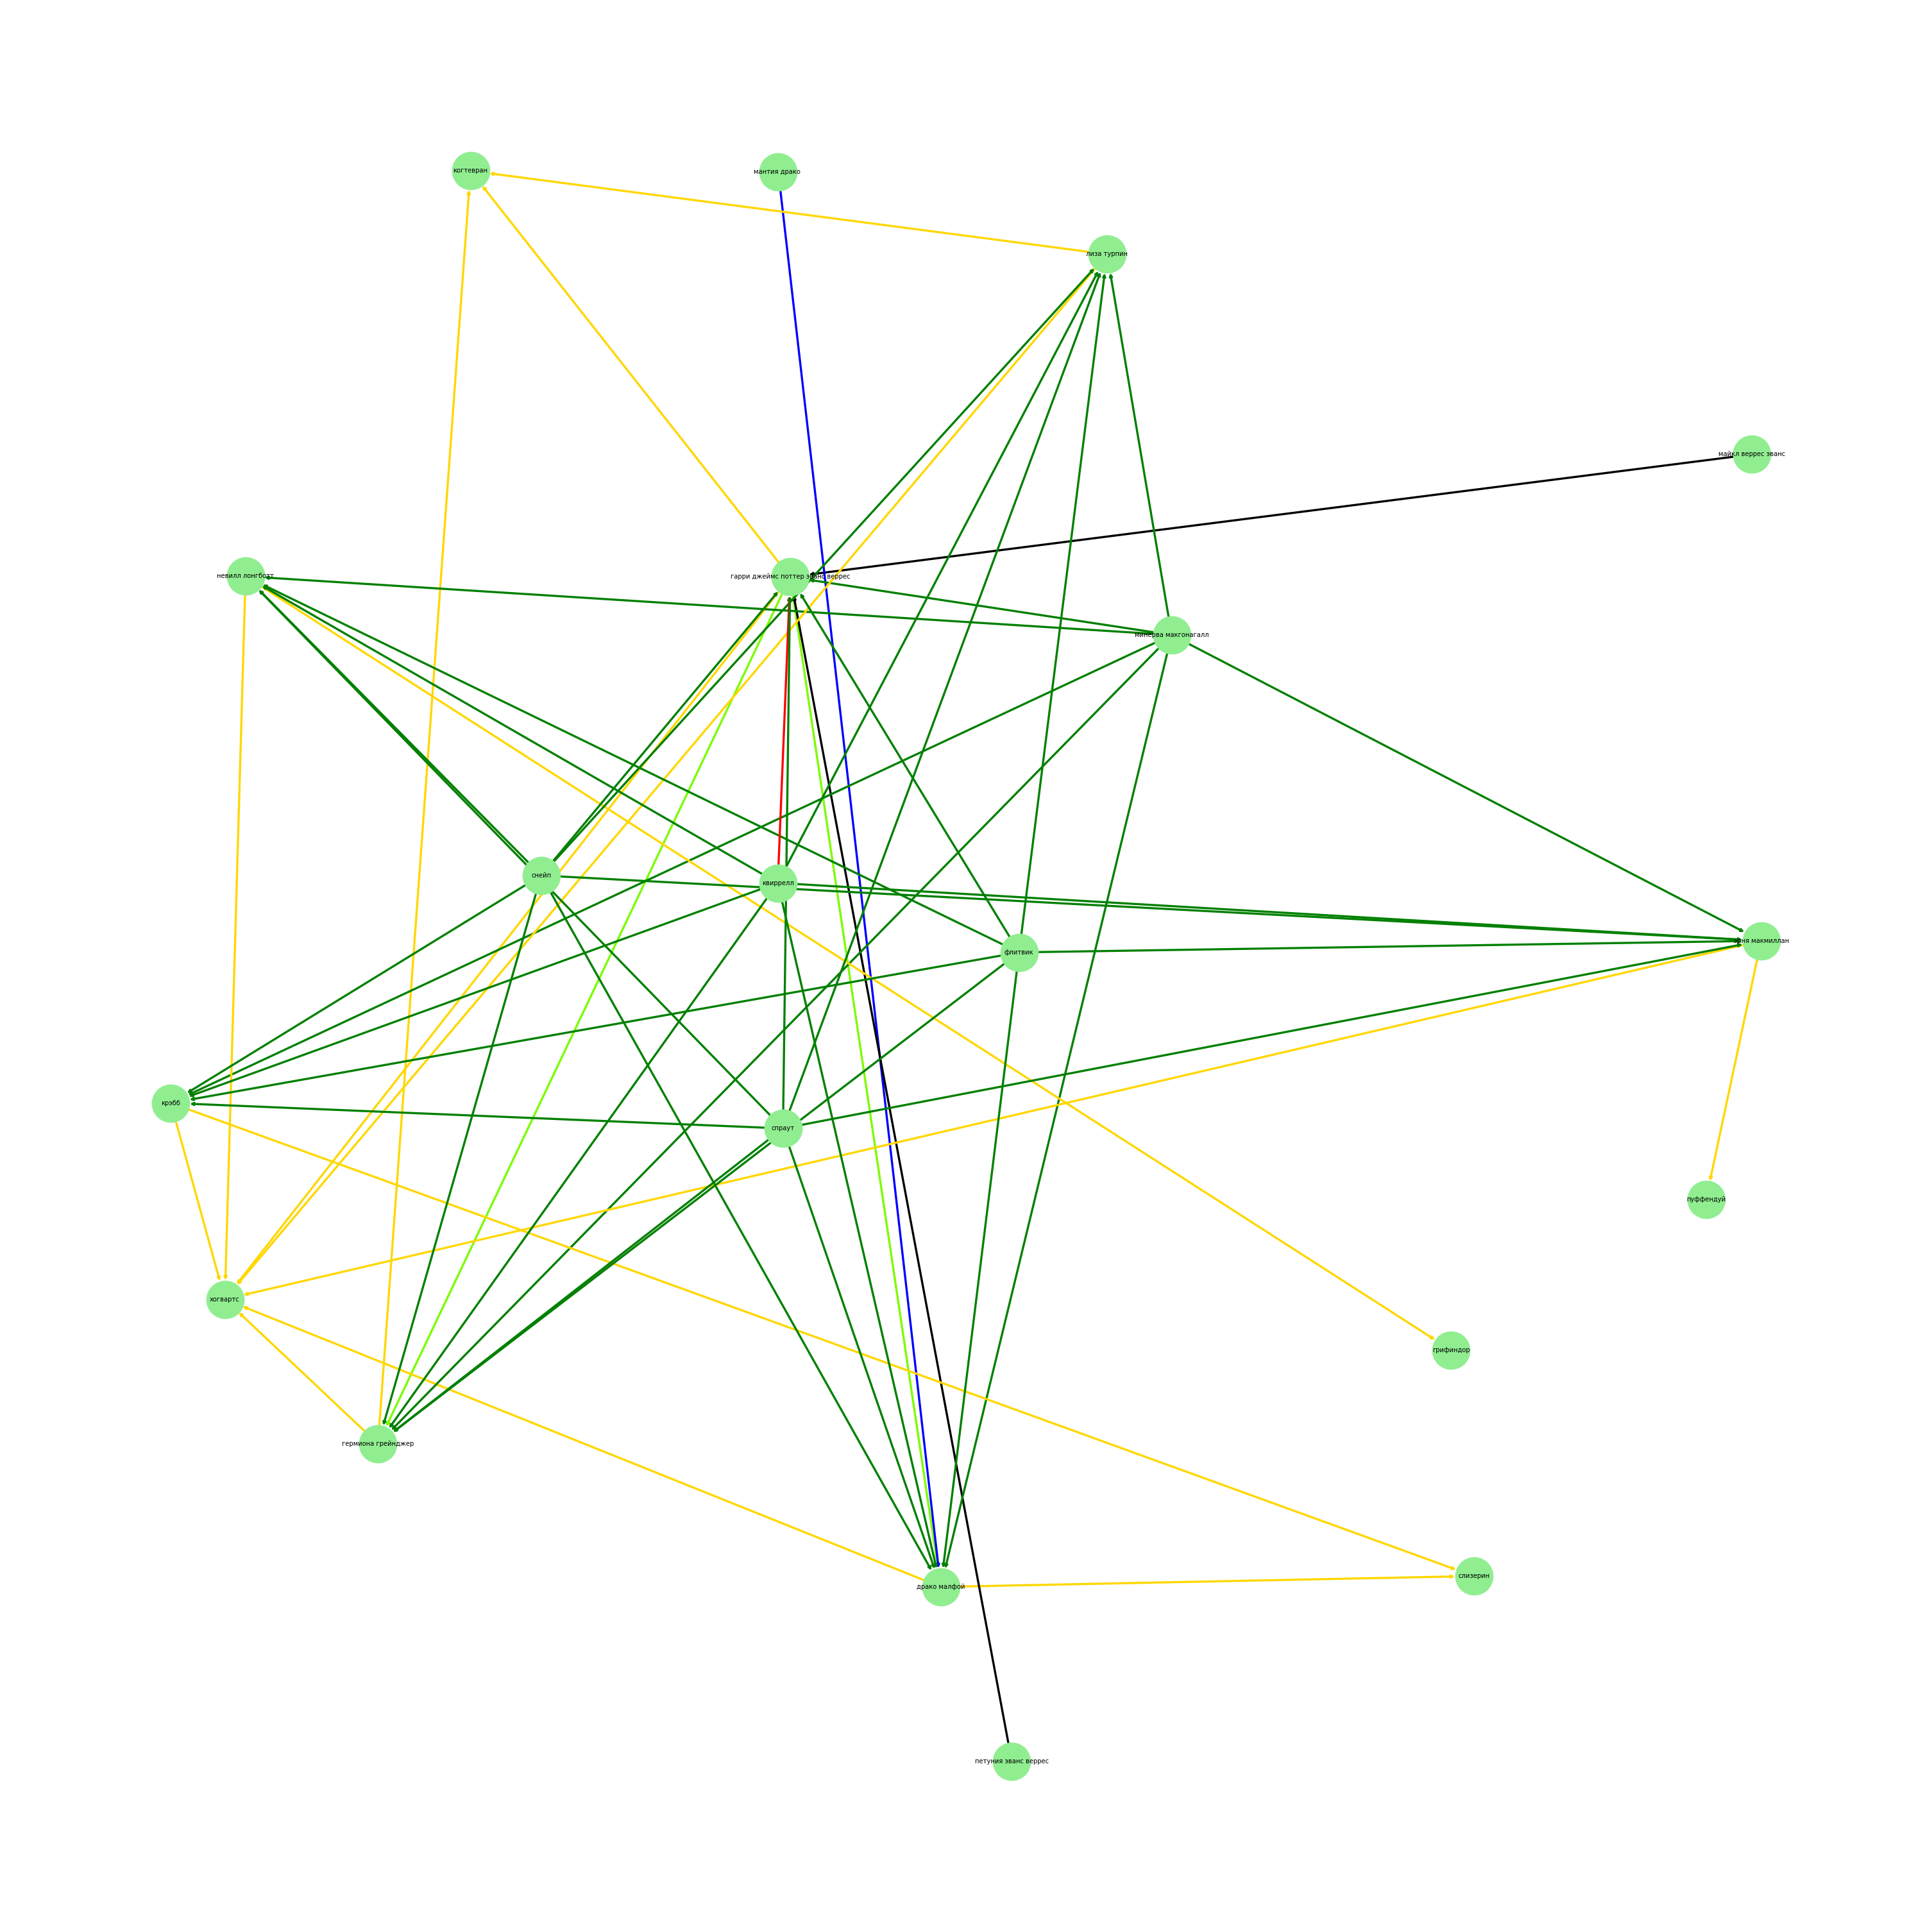

In [4]:
pos = nx.spring_layout(graph, k=1.5, iterations=40)
fig = plt.figure(1, figsize=(50, 50), dpi=60)
options = {
    'node_color': '#90EE90',
    'edge_color': edge_colors,
    'width': 4,
    'edge_cmap': plt.cm.Blues,
}
nx.draw(graph, pos, **options ,with_labels=True, node_size=5000, font_size=12)
plt.show()

## Заключение

* Выполнено описание связей между сущностями, полученными в лабораторной работе №5
* Построена онтологическая модель на основе ориентированного графа персонажей книги Гарри Поттера